In [1]:
#In this we will read the .csv file generated by RMG.Py's plotting function. Specifically we will be able to generate a 
#plot of the important species and numerically calculate things like selectivity

In [2]:
from rmgpy.species import Species
import matplotlib.pyplot as plt
import pandas
import os.path
import numpy as np
%matplotlib inline

In [3]:
#Simulate the mechanism to generate a csv vile

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t66/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t66/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t66/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 8.42654395103 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix wi

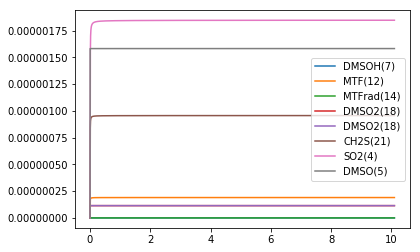

In [10]:
#This cell will generate plots of the species I care about
data = pandas.read_csv('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/solver/simulation_1_45.csv')
data_mat = data.as_matrix()
#list(data)
#xvar = data.iloc[:,0]
#xvar_mat = xvar.as_matrix()
#print(xvar_mat)
#list(data.columns
for i in range(len(list(data))):
    if 'Time' in list(data)[i]:
        xvar = data.iloc[:,i]
        xvar_mat = xvar.as_matrix()
    if 'DMSO' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        plt.plot(xvar_mat, yvar1_mat, label=list(data)[i])
    if 'SO2' in list(data)[i]:
        yvar2 = data.iloc[:,i]
        yvar2_mat = yvar2.as_matrix()
        plt.plot(xvar_mat, yvar2_mat, label=list(data)[i])
    if 'MTF' in list(data)[i]:
        yvar3 = data.iloc[:,i]
        yvar3_mat = yvar3.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
    if 'CH2S' in list(data)[i]:
        yvar4 = data.iloc[:,i]
        yvar4_mat = yvar4.as_matrix()
        plt.plot(xvar_mat, yvar4_mat, label=list(data)[i])
plt.legend()
#data.plot(x='Time (s)', y='DMSO(6)')
#data.plot(x='Time (s)', y='SO2(23)')
    

In [11]:
#This cell will calculate the final selectivities toward each of the products
for i in range(len(list(data))):
    if 'DMS(1)' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        DMS_init = yvar1_mat[0]
        DMS_final = yvar1_mat[-1]
        Delta_DMS = DMS_init - DMS_final
        DMS_index = i
        
for i in range(len(list(data))):
    yvar1 = data.iloc[:,i]
    yvar1_mat = yvar1.as_matrix()
    final_mole_fraction = yvar1_mat[-1]
    print str(list(data)[i]) + ': ' + str(final_mole_fraction/Delta_DMS)
        

Time (s): 1947588.08849
Volume (m^3): 4778.44742593
DMSOH(7): 1.88698609798e-14
OOH(8): 5.90155813005e-08
C2H5O2S(9): 5.76189996793e-05
C2H5OS(10): 9.49449879751e-18
CSCOH(11): 0.0395568914196
MTF(12): 0.0366926495274
CH3(13): 3.36193394191e-11
MTFrad(14): 3.55855401655e-18
CH4(15): 0.000233714552194
H2O(16): 3.2341866315
S(17): 2.68565823527e-35
DMSO2(18): 0.0221258982571
CSrad(19): 2.84624946535e-08
CH3O2S(20): 1.62350079533e-09
CH2S(21): 0.184351436016
CSOrad(22): 3.97882311919e-11
O(23): 2.75059067312e-16
CH3O2S(24): 4.13628206487e-13
CH2O3(25): 0.0
CO2(26): 0.0
N2: 153311.904725
Ne: 0.0
DMS(1): 1.8928957794
HOOH(2): 1.93638590358
OH(3): 2.54070219175e-09
SO2(4): 0.356062638387
DMSO(5): 0.30505206731
O2(6): 39536.2862443
H(27): 1.79461037067e-13
C2H5S(53): 5.13790467748e-14
CH2O(36): 0.596111861606
COS(101): 0.00179367583391
CH3O2(177): 0.249583609497
CH3SH(54): 0.0542947020806
COO(149): 0.1066363662
S(83): 1.15043454712e-09
S(234): 3.107376751e-23
C2H3OS(98): 1.35866304708e-13
S(2

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [14]:
#This will automatically generate the temperature and O2 comparison plots based on a certain model
index = 52
#Read in the base input file
inputpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/input.py' 
with open(inputpath) as f:
    log = f.read().splitlines()
#Reference the base chem.inp and species dictionary
chempath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/chem_annotated.inp'
dictpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/species_dictionary.txt'
#make a new directory for the various input files and new .csv files
basepath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/ExperimentalComparisons'
os.makedirs(basepath)

T_vec = [260, 270, 280, 290, 298]
O2_vec = [0, 200, 500]
N2_vec = [0.99994, 0.79994, 0.49994]

#write each of the 15 input files to their own folder in the Experimental Comparisons Folder
#Loop over temperatures
for j in range(len(T_vec)):
    #Loop over Oxygen content
    for k in range(len(O2_vec)):
        basepath2 = basepath + '/' + str(T_vec[j]) + '_' + str(O2_vec[k])
        os.makedirs(basepath2)
        filename = os.path.join(basepath2, 'input_'+ str(T_vec[j]) + '_' + str(O2_vec[k]) + '.py')
        file = open(filename, 'wb')
        for n in xrange(len(log)):
            if 'temperature=(' in log[n]:
                file.write('    temperature=(' + str(T_vec[j]) + ',\'K\'),\n')
            elif '"O2":' in log[n]:
                file.write('        "O2": 0.' + str(O2_vec[k]) +',\n')
            elif '"N2":' in log[n]:
                file.write('        "N2": ' + str(N2_vec[k]) + ',\n')
            else:
                file.write(log[n] + '\n')
        file.close()
#Run the input files with the simulate script
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/260_0/input_260_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/260_200/input_260_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/260_500/input_260_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/270_0/input_270_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/270_200/input_270_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/270_500/input_270_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/280_0/input_280_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/280_200/input_280_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/280_500/input_280_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/290_0/input_290_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/290_200/input_290_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/290_500/input_290_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/298_0/input_298_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/298_200/input_298_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/ExperimentalComparisons/298_500/input_298_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt

#Compare the DMSO, SO2, DMSO2, MTF, and OCS concentration to experiments

Using Theano backend.
Simulation took 1.73090314865 seconds
Using Theano backend.
Simulation took 1.60584998131 seconds
Using Theano backend.
Simulation took 7.75026392937 seconds
Using Theano backend.
Simulation took 8.94089317322 seconds
Using Theano backend.
Simulation took 6.93285417557 seconds
Using Theano backend.
Simulation took 5.66187810898 seconds
Using Theano backend.
Simulation took 7.09112787247 seconds
Using Theano backend.
Simulation took 7.87988996506 seconds
Using Theano backend.
Simulation took 7.79391288757 seconds
Using Theano backend.
Simulation took 6.68042111397 seconds
Using Theano backend.
Simulation took 3.73551797867 seconds
Using Theano backend.
Simulation took 4.53972697258 seconds
Using Theano backend.
Simulation took 2.67153310776 seconds
Using Theano backend.
Simulation took 3.68167901039 seconds
Using Theano backend.
Simulation took 1.78017115593 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:53:

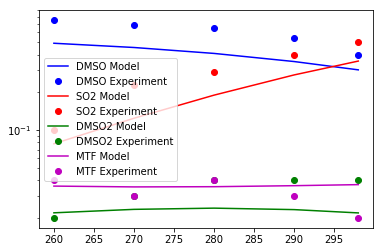

In [16]:
#This will read the .csv files generated above and create comparison plots for DMSO, SO2, DMSO2, MTF, and OCS
Tvec = [260, 270, 280, 290, 298]
Pvec = [0, 200, 500]

DMSO_exp = np.zeros((3,5))
DMSO_model = np.zeros((3,5))
DMSO_exp[1][:] = [0.75, 0.69, 0.65, 0.54, 0.4]

SO2_exp = np.zeros((3,5))
SO2_model = np.zeros((3,5))
SO2_exp[1][:] = [0.1, 0.23, 0.29, 0.4, 0.5]

DMSO2_exp = np.zeros((3,5))
DMSO2_model = np.zeros((3,5))
DMSO2_exp[1][:] = [0.02, 0.03, 0.04, 0.04, 0.04]

MTF_exp = np.zeros((3,5))
MTF_model = np.zeros((3,5))
MTF_exp[1][:] = [0.04, 0.03, 0.04, 0.03, 0.02]

OCS_exp = np.zeros((3,5))
OCS_model = np.zeros((3,5))

#Fill in the matrices
#Loop over temperature
for j in range(len(Tvec)):
    #Loop over Oxygen content
    for k in range(len(Pvec)):  
        data = pandas.read_csv(basepath + '/' + str(Tvec[j]) + '_' + str(Pvec[k]) + '/solver/simulation_1_45.csv')
        data_mat = data.as_matrix()
        i = 0
        for i in range(len(list(data))):
            if 'DMS(1)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                DMS_init = yvar1_mat[0]
                DMS_final = yvar1_mat[-1]
                Delta_DMS = DMS_init - DMS_final
                DMS_index = i
        for i in range(len(list(data))):
            if 'DMSO(5)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'SO2(4)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                SO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'DMSO2(18)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'MTF(12)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                MTF_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'COS(101)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                OCS_model[k][j] = final_mole_fraction/Delta_DMS

#plot the temperature variance at constant 200 mbar O2 
plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')

plt.plot(Tvec, SO2_model[1][:], 'r', label='SO2 Model')
plt.plot(Tvec, SO2_exp[1][:], 'ro', label='SO2 Experiment')

plt.plot(Tvec, DMSO2_model[1][:], 'g', label='DMSO2 Model')
plt.plot(Tvec, DMSO2_exp[1][:], 'go', label='DMSO2 Experiment')

plt.plot(Tvec, MTF_model[1][:], 'm', label='MTF Model')
plt.plot(Tvec, MTF_exp[1][:], 'mo', label='MTF Experiment')
plt.yscale('log')

#plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
#plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')
plt.legend()

In [30]:
DMSO_exp = np.zeros((3,5))

In [18]:
#This cell will run sensitivity analysis using RMG-Py solver

#submit the job
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/chemkin/species_dictionary.txt


Using Theano backend.
ERROR:root:The input file "/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/SensitivityTest/input.py" was invalid:
ERROR:root:name 'uncertainty' is not defined
Traceback (most recent call last):
  File "/home/rgillis/Code/RMG-Py/rmgpy/rmg/input.py", line 740, in readInputFile
    exec f in global_context, local_context
  File "/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t52/SensitivityTest/input.py", line 90, in <module>
    uncertainty(
NameError: name 'uncertainty' is not defined
Traceback (most recent call last):
  File "/home/rgillis/Code/RMG-Py/scripts/simulate.py", line 74, in <module>
    main()
  File "/home/rgillis/Code/RMG-Py/scripts/simulate.py", line 69, in main
    run_simulation(inputFile, chemkinFile, dictFile, diffusionLimited=dflag, checkDuplicates=checkDuplicates)
  File "/home/rgillis/Code/RMG-Py/rmgpy/tools/simulate.py", line 150, in run_simulation
    rmg = loadRMGJob(inputFile, chemkinFile, dictFile, generateImages=False, checkDuplicates=c

In [33]:
#test some other mechanism to see if it is my mechanism's problem or RMG's

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 7.5404279232 seconds


In [ ]:
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt
